# What are the most effective marketing channels and campaigns? Evaluate the ROI of different marketing channels.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [14]:
file_id = '1GtTpo6aDmayZDTzaEbZSPLqvQ8riJN59' 
url = f'https://drive.google.com/uc?id={file_id}'
output = 'final_campaigns.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1GtTpo6aDmayZDTzaEbZSPLqvQ8riJN59
To: /Users/yilin/Documents/DSA3101/DSA3101-Project/Customer Behaviour/final_campaigns.csv
100%|██████████| 9.44k/9.44k [00:00<00:00, 11.5MB/s]


## Calculating Total Cost of each Channel 

In [15]:
def calculate_channel_cost(row):
    # calculate number of customers who purchased
    num_purchased = row['percentage_purchased'] / 100 * row['total_count']
    
    # calculate channel cost
    if row['channel'] == 'mobile_push':
        channel_cost = (row['total_count'] * 0.012) + 9  # cost per recipient + flat fee
    elif row['channel'] == 'email':
        if row['total_count'] <= 20000:
            channel_cost = 9  # flat fee for total_count <= 20,000
        else:
            channel_cost = (row['total_count'] / 1000) * 2 + 9  # cost per 1000 + flat fee
    elif row['channel'] == 'sms':
        channel_cost = (row['total_count'] * 0.0079) + 9  # cost per recipient + flat fee
    elif row['channel'] == 'multichannel':
        channel_cost = (row['total_count'] * 0.0219) + 9  # combined cost per recipient + flat fee
    
    # calculate total cost (product costs use only the purchasers)
    product_costs = row['product_cost'] * num_purchased
    total_cost = product_costs + channel_cost
    return total_cost, product_costs, channel_cost

In [16]:
# calculate cost and revenue for each campaign
df[['total_cost', 'product_costs', 'channel_cost']] = df.apply(lambda row: pd.Series(calculate_channel_cost(row)), axis=1)

# calculate revenue and ROI for each campaign
df['revenue'] = (df['percentage_purchased'] / 100) * df['total_count'] * df['product_price']
df['roi'] = (df['revenue'] - df['total_cost']) / df['total_cost'] * 100


# evaluate the most effective marketing channel
channel_performance = df.groupby('channel').agg({'revenue': 'sum', 'total_cost': 'sum'})
channel_performance['roi'] = ((channel_performance['revenue'] - channel_performance['total_cost']) / channel_performance['total_cost']) * 100

print("Channel performance evaluation:")
print(channel_performance.sort_values(by='roi', ascending=False))



Channel performance evaluation:
                   revenue    total_cost        roi
channel                                            
email         1.437243e+08  8.665810e+07  65.852072
mobile_push   6.814761e+07  4.299531e+07  58.500090
multichannel  7.388150e+00  1.368425e+01 -46.009829


The Email channel exhibits the highest ROI at 65.85%, underscoring its efficiency and profitability.
With an ROI of 58.50%, the Mobile Push channel also demonstrates strong performance.
The Multichannel channel presents a negative ROI of -46.01%, but it's important to note that this is derived from a singular data point in the dataset.

## Graph of ROI by Channel 

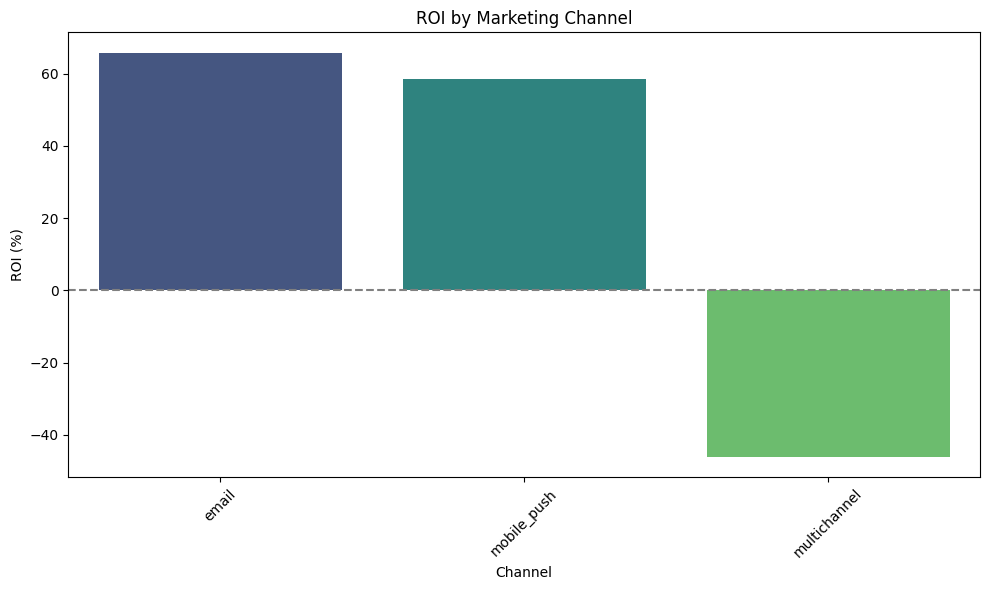

In [17]:
# plotting the ROI by Channel
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_performance.index, y=channel_performance['roi'], palette='viridis')
plt.title('ROI by Marketing Channel')
plt.xlabel('Channel')
plt.ylabel('ROI (%)')
plt.axhline(0, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ROI Performance of Subject Features

In [18]:
# create binary columns for subject features
df['personalization'] = df['subject_with_personalization'].apply(lambda x: 1 if x else 0)
df['deadline'] = df['subject_with_deadline'].apply(lambda x: 1 if x else 0)
df['emoji'] = df['subject_with_emoji'].apply(lambda x: 1 if x else 0)
df['bonuses'] = df['subject_with_bonuses'].apply(lambda x: 1 if x else 0)
df['discount'] = df['subject_with_discount'].apply(lambda x: 1 if x else 0)
df['saleout'] = df['subject_with_saleout'].apply(lambda x: 1 if x else 0)

# calculate ROI for each feature group within channels
subject_features = ['personalization', 'deadline', 'emoji', 'bonuses', 'discount', 'saleout']

for feature in subject_features:
    feature_performance = df.groupby(['channel', feature]).agg({'revenue': 'sum', 'total_cost': 'sum'})
    feature_performance['roi'] = ((feature_performance['revenue'] - feature_performance['total_cost']) / feature_performance['total_cost']) * 100
    
    print(f"{feature.capitalize()} Feature Performance:")
    print(feature_performance.sort_values(by='roi', ascending=False))


Personalization Feature Performance:
                                   revenue    total_cost        roi
channel      personalization                                       
email        0                1.437242e+08  8.665806e+07  65.852103
mobile_push  0                6.007311e+07  3.785696e+07  58.684466
             1                8.074498e+06  5.138355e+06  57.141691
email        1                3.295544e+01  3.591070e+01  -8.229461
multichannel 0                7.388150e+00  1.368425e+01 -46.009829
Deadline Feature Performance:
                            revenue    total_cost        roi
channel      deadline                                       
email        1         4.957659e+07  2.873705e+07  72.518035
             0         9.414767e+07  5.792105e+07  62.544810
mobile_push  0         6.814761e+07  4.299531e+07  58.500090
multichannel 0         7.388150e+00  1.368425e+01 -46.009829
Emoji Feature Performance:
                         revenue    total_cost        roi
channe

Key features such as "saleout" and "discount" have been instrumental in elevating engagement and conversion rates across channels. These features introduce a sense of urgency, trigger quicker consumer decision-making, and add tangible value to the customer proposition, thus increasing attention and interaction. Their strategic deployment can significantly bolster marketing effectiveness by aligning offer timing and content with consumer expectations.

## Conclusion:

The analysis highlights the primacy of the Email channel as the most effective in generating ROI, followed closely by Mobile Push. Both channels demonstrate substantial efficacy, driven by strategic feature inclusion. Meanwhile, the multichannel strategy, due to its singular data point, requires further exploration and refinement. Focusing on and optimizing feature use within these channels can amplify their effectiveness, promoting higher ROI and strategic market positioning.